In [45]:
from src.talkers.stocks import Stocks
import pandas as pd

In [46]:
petro = Stocks('petr4')

In [47]:
history_price = petro.get_prices()
table = pd.DataFrame(history_price)
table.set_index('date', inplace=True)
table = table[['price']]


<Axes: title={'center': 'Historical Prices'}, xlabel='Date', ylabel='Price'>

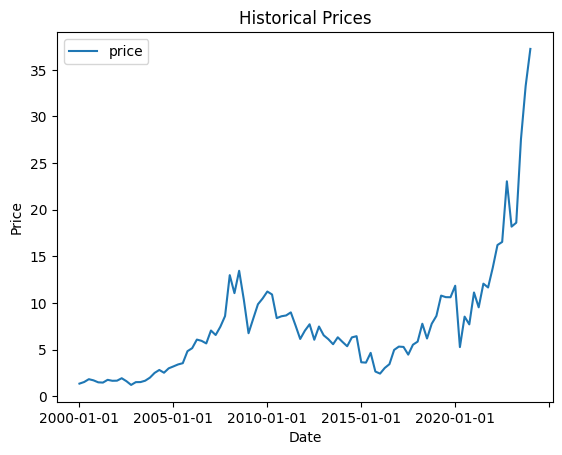

In [48]:
table.plot(kind='line', title='Historical Prices', xlabel='Date', ylabel='Price')

In [49]:
history_dividends = petro.get_dividends()
table = pd.DataFrame(history_dividends)
table.set_index('year', inplace=True)
table = table[['value']]

<Axes: title={'center': 'Historical Dividends'}, xlabel='Year', ylabel='Value'>

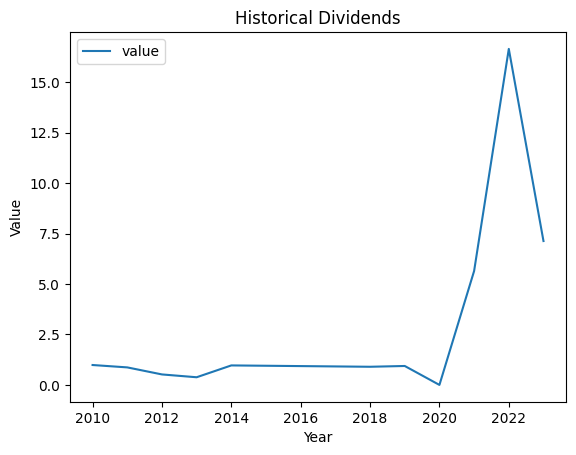

In [50]:
table.plot(kind='line', title='Historical Dividends', xlabel='Year', ylabel='Value')

In [51]:
print(history_price[:5])

[{'name': '', 'ticker': '', 'date': '2000-01-01', 'price': 1.3710531221440005, 'dividends': []}, {'name': '', 'ticker': '', 'date': '2000-04-01', 'price': 1.5424344808776418, 'dividends': []}, {'name': '', 'ticker': '', 'date': '2000-07-01', 'price': 1.8456486717792346, 'dividends': []}, {'name': '', 'ticker': '', 'date': '2000-10-01', 'price': 1.720407620725709, 'dividends': []}, {'name': '', 'ticker': '', 'date': '2001-01-01', 'price': 1.5088178874884297, 'dividends': []}]


In [52]:
prices_by_year = {}
for price in history_price:
    year = price['date'][:4]
    if year not in prices_by_year:
        prices_by_year[year] = price['price']


In [58]:
print(history_dividends)
print(prices_by_year)

[{'year': 2023, 'value': 7.133}, {'year': 2022, 'value': 16.657}, {'year': 2021, 'value': 5.648}, {'year': 2020, 'value': 0.0}, {'year': 2019, 'value': 0.939}, {'year': 2018, 'value': 0.9}, {'year': 2014, 'value': 0.967}, {'year': 2013, 'value': 0.38}, {'year': 2012, 'value': 0.52}, {'year': 2011, 'value': 0.869}, {'year': 2010, 'value': 0.987}]
{'2000': 1.3710531221440005, '2001': 1.5088178874884297, '2002': 1.6858016312639474, '2003': 1.5292509794235232, '2004': 2.5179921045209195, '2005': 3.2134051513260613, '2006': 5.170563970302593, '2007': 7.060987309101882, '2008': 12.996409077812016, '2009': 6.7716722843040635, '2010': 11.24035578863326, '2011': 8.675732152592458, '2012': 7.0481078054767226, '2013': 6.548847635581778, '2014': 5.840695811690071, '2015': 3.657198709623305, '2016': 2.442994481426875, '2017': 5.338126129454842, '2018': 5.870478326366009, '2019': 8.626974798033824, '2020': 11.8611296650415, '2021': 11.138811018854579, '2022': 13.801094818329968, '2023': 18.193689926

In [60]:
dividend_yield = {}
for dividend in history_dividends:
    dividend_yield[str(dividend['year'])] = dividend['value']/prices_by_year[str(dividend['year'])]


{'2023': 0.3920590066583036, '2022': 1.2069332338675736, '2021': 0.507055913816984, '2020': 0.0, '2019': 0.10884464392013846, '2018': 0.15330948348073117, '2014': 0.16556246570221358, '2013': 0.05802547580055924, '2012': 0.07377866717588155, '2011': 0.1001644569836481, '2010': 0.08780860842484164}


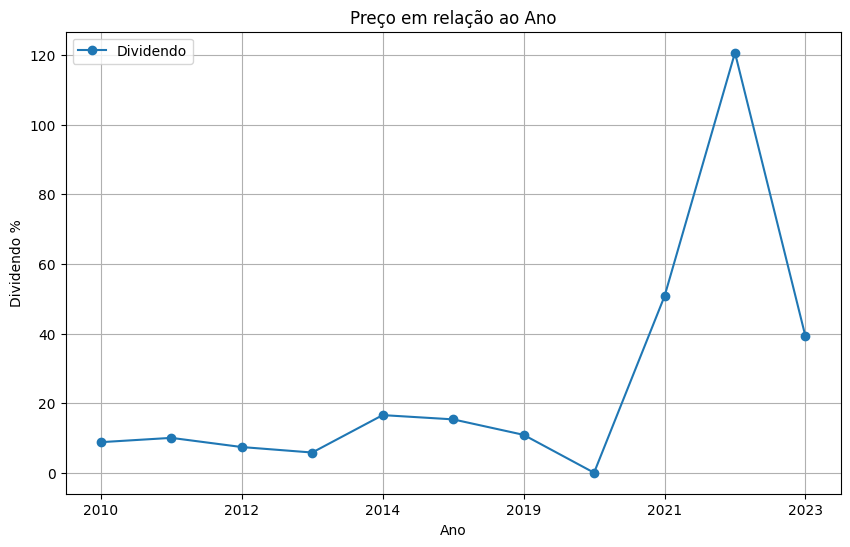

In [63]:
df = pd.DataFrame(list(dividend_yield.items()), columns=['Ano', 'Dividendo'])
df = df.sort_values(by='Ano')
df['Dividendo'] = df['Dividendo']*100

ax = df.plot(x='Ano', y='Dividendo', kind='line', marker='o', figsize=(10, 6))
ax.set_title('Preço em relação ao Ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Dividendo %')
ax.grid(True)